Corpus NLP Review

1) What are the 10 most frequent word trigrams (including punctuation) in the Brown corpus?

In [6]:
from nltk.util import ngrams
from nltk import FreqDist
from nltk.corpus import brown

trigrams = ngrams(brown.words(), 3)
fdist = FreqDist(trigrams)
topten = fdist.most_common(10)
print(topten)

[(("''", '?', '?'), 915), (("''", '.', '``'), 702), ((',', 'and', 'the'), 652), (('.', 'It', 'is'), 529), (('.', 'It', 'was'), 518), (('.', 'In', 'the'), 398), (('?', '?', '``'), 381), (('.', '``', 'I'), 359), (("''", '!', '!'), 350), (("''", ',', 'he'), 346)]


2) Find all the words which occur at least 250 times in the Brown corpus but do not occur at all in Moby Dick. For this problem, you should normalize both corpora by removing all punctuation and folding everything to lower case.

In [7]:
from nltk.corpus import gutenberg
import string

punctuations = list(string.punctuation)
additional_punc = ['``',"''",'--']

brown_fdist = FreqDist(brown.words())
brown_common_words = [w.lower() for w in brown_fdist if brown_fdist[w] > 249 and w.isalpha and w not in punctuations and w not in additional_punc]

moby = gutenberg.words('melville-moby_dick.txt')
moby_common_words = [w.lower() for w in moby if w.isalpha() and w not in punctuations]

brown_unique_words = [w for w in brown_common_words if w not in moby_common_words]
print(brown_unique_words)

['program', '1', '2', 'mrs.', 'toward', 'members', "didn't", "i'm", '3', 'mr.', "don't", 'af']


3) Find the words in nltk.corpus.words.words() that have the longest sequence of consonants. For example, strengths has 5 consonants in a row: 𝑛, 𝑔, 𝑡, h, and 𝑠. Are there any longer se- quences? For the purposes of this question, you should consider 𝑦 to be a vowel.

In [3]:
from nltk.corpus import words
import string
import re
from itertools import groupby
is_vowel = lambda char: char in "aAeEiIoOuU"
best_conso_chains = []
def consoFind(in_str):
    consos = ["".join(g) for v, g in groupby(in_str, key=is_vowel) if not v]
    sortedconsos = sorted(consos, key=len)
    best = sortedconsos[-1]
    return best

#vowels used in joining to avoid flaws in how punctuation is read
strwords = 'A, A'.join(words.words())
best_conso_seq = consoFind(strwords)
print("best sequence = ", best_conso_seq)
print(len(best_conso_seq), "sequential consonants!")
for word in words.words():
    if best_conso_seq in word:
        print("word = ", word)


best sequence =  glycyphyll
10 sequential consonants!
word =  glycyphyllin


4) The Coleman-Liau Index (see https://en.wikipedia.org/wiki/Coleman-Liau_index) is a measure of text readability, de ined as:
𝐶𝐿𝐼 = 0.0588 × 𝐿 − 0.296 × 𝑆 − 15.8
where 𝐿 is the average number of letters in the text per 100 words and 𝑆 is the average number of sentences per 100 words (skipping punctuation). Write a function which calculates the 𝐶𝐿𝐼 for a text, and print a table showing the readability level of Presidential inaugural addresses by year. (For extra credit, also show the results as a graph!)

In [4]:

from nltk.tokenize import word_tokenize, sent_tokenize

def CLIreadability(text):
 
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    text = ('\n-----\n'.join(tokenizer.tokenize(text)))
  
    num_chars = len([char for char in text])
    #num_letters could be a refinement for accuracy
    num_words = len(word_tokenize(text))
    num_sents = len(sent_tokenize(text))
    
    L = num_chars/num_words*100
    S = num_sents/num_words*100
    #print(L, S)
    
    return 0.0588 * L - 0.296 * S - 15.8


    date  CLIreadability
0   1789       15.849357
1   1793       13.745641
2   1797       14.613001
3   1801       13.417721
4   1805       14.466916
5   1809       15.395095
6   1813       14.364979
7   1817       13.269478
8   1821       13.681032
9   1825       15.273858
10  1829       15.543844
11  1833       14.979748
12  1837       15.286123
13  1841       14.273482
14  1845       14.233210
15  1849       15.520129
16  1853       14.223242
17  1857       13.822932
18  1861       12.399427
19  1865       11.335550
20  1869       12.668627
21  1873       12.712070
22  1877       14.736800
23  1881       13.816305
24  1885       14.878337
25  1889       13.967610
26  1893       15.763297
27  1897       13.650295
28  1901       13.184357
29  1905       12.149388
30  1909       14.331701
31  1913       11.267395
32  1917       11.286536
33  1921       12.950221
34  1925       12.408008
35  1929       13.875032
36  1933       12.036853
37  1937       11.731459
38  1941       10.051187


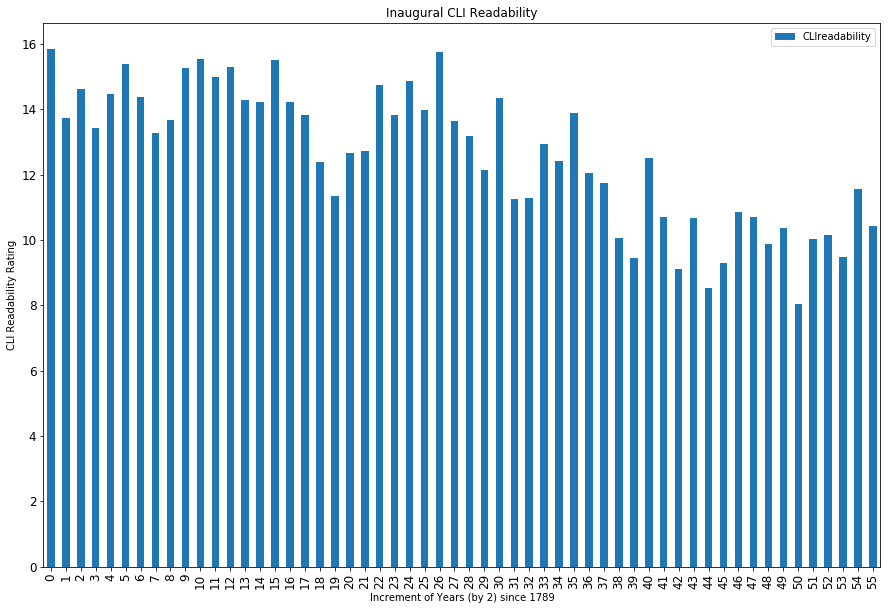

In [5]:
import nltk
import pandas as pd
from nltk.corpus import inaugural
import matplotlib.pyplot as plt

pairlist = []

for fileid in inaugural.fileids():
    #print(fileid)
    raw = inaugural.raw(fileid)
    cli = CLIreadability(raw)
    #print(cli)
    pair = (fileid[:4], cli)
    pairlist.append(pair)
    
#print(pairlist)
df = pd.DataFrame(pairlist, columns=['date','CLIreadability'])
print(df)

ax = df[['CLIreadability']].plot(kind='bar', title ="Inaugural CLI Readability", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Increment of Years (by 2) since 1789")
ax.set_ylabel("CLI Readability Rating")
plt.show()